In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from helper import (plot_hexbin_accumulated, average_cell_type_correlations, calculate_cell_type_differences_and_correlations)

In [2]:
# loading Akita predictions for model 0 test set
preds = np.load("/project/fudenber_735/akitaX1_analyses_data/cell_type_specificity/test_mouse_fold0_AkitaV2/combined_pred_matrices.npy", allow_pickle=True)

In [3]:
# loading target maps for model 0 test set
targets = np.load("/project/fudenber_735/akitaX1_analyses_data/cell_type_specificity/test_mouse_fold0_AkitaV2/combined_target_matrices.npy", allow_pickle=True)

In [4]:
cell_types = ['mESC (Hsieh2019)', 'mESC (Bonev2017)', 'cortical neuron', 'neocortex cortical neuron', 'neural progenitor cell', 'neocortex neural progenitor cell']

## Pixel-wise correlations

Plotting for mESC (Hsieh2019)...


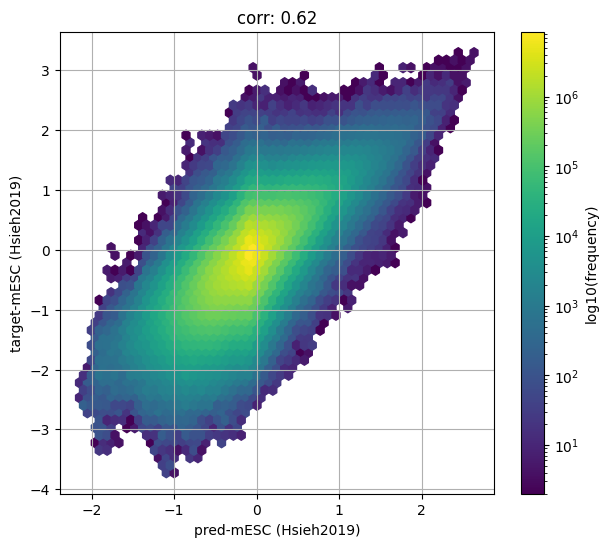

Plotting for mESC (Bonev2017)...


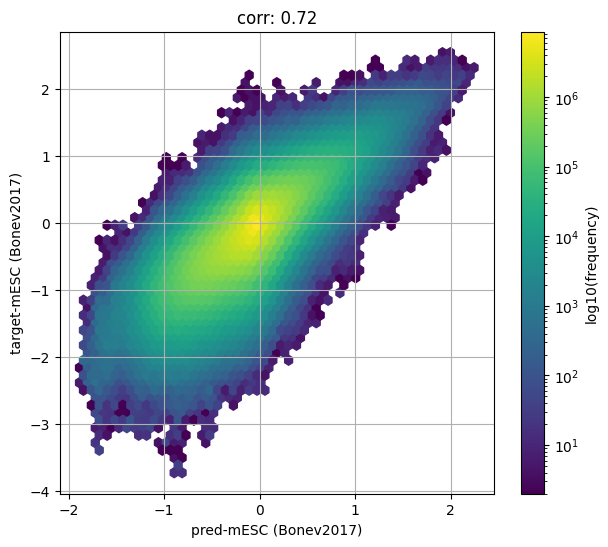

Plotting for cortical neuron...


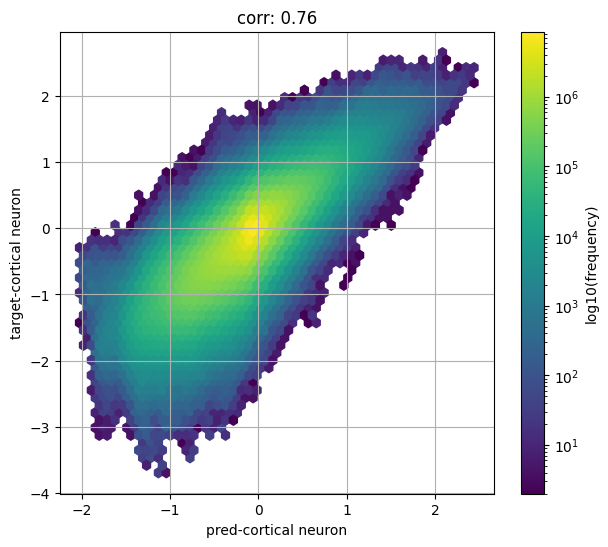

Plotting for neocortex cortical neuron...


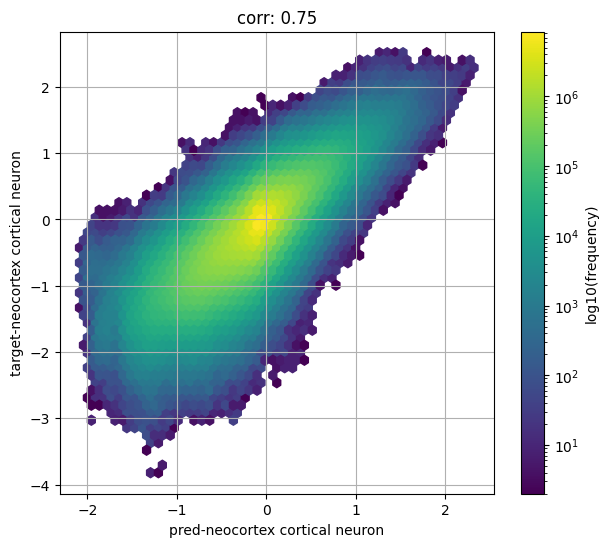

Plotting for neural progenitor cell...


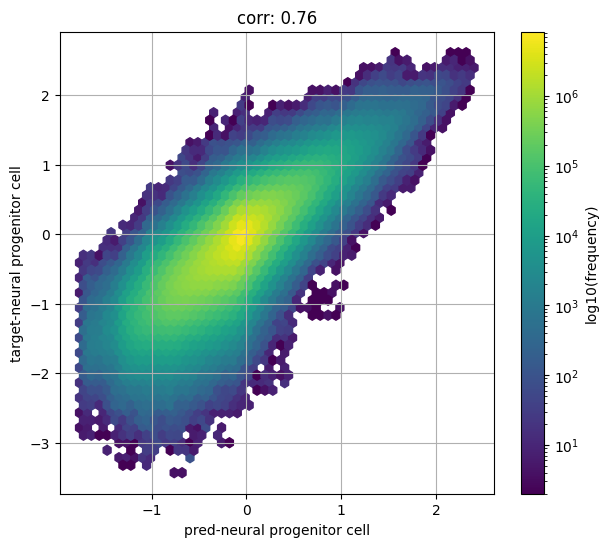

Plotting for neocortex neural progenitor cell...


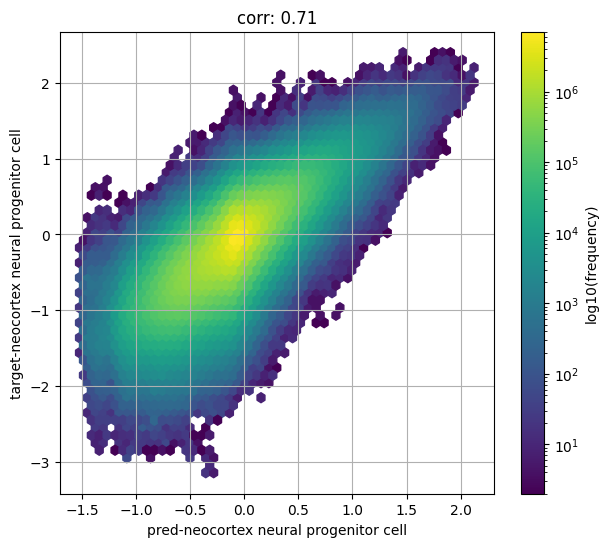

In [5]:
for idx, cell_type in enumerate(cell_types):
    print(f"Plotting for {cell_type}...")
    plot_hexbin_accumulated(preds, targets, cell_type_idx=idx, cell_type_name=cell_type, save_path=f"./plots_mouse/{cell_type}_corr.pdf")

## Correlations between predictions

In [6]:
# Calculate the average correlations for preds
pred_corr_avg = average_cell_type_correlations(preds)

In [16]:
# Function to plot heatmap of correlations
def plot_heatmap(corr_matrix, title, cell_type_names, save_path=None):
    plt.figure(figsize=(8, 6))
    
    mask = np.tril(np.ones_like(corr_matrix, dtype=bool))
    
    vmin = np.min(corr_matrix)
    vmax = np.max(corr_matrix)
    
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis', 
                vmin=vmin, vmax=vmax, mask=mask, cbar_kws={"shrink": .8},
                xticklabels=cell_type_names, yticklabels=cell_type_names)
    
    plt.title(title)
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', format="pdf")
    
    plt.show()

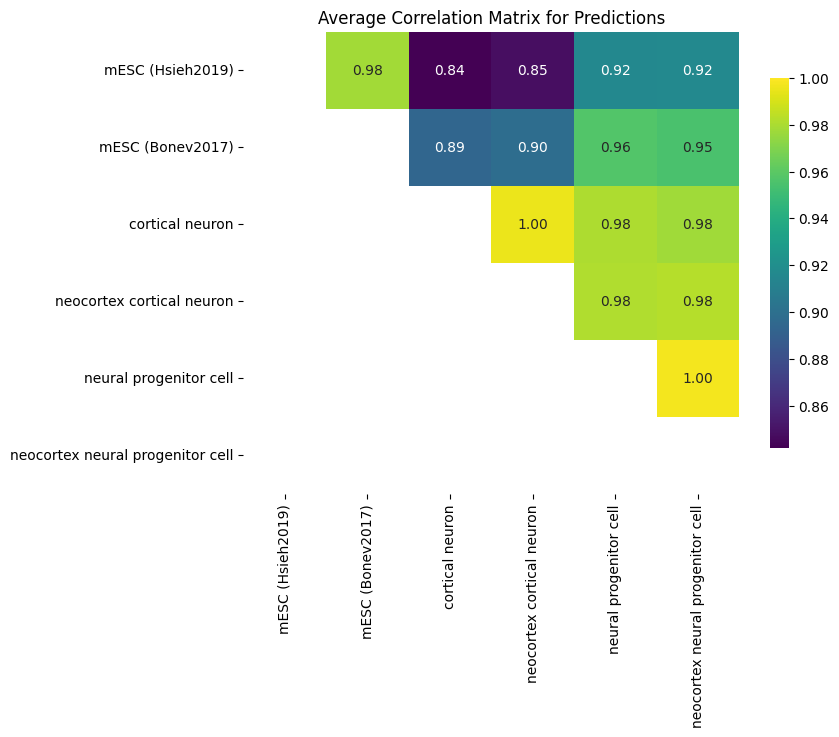

In [9]:
plot_heatmap(pred_corr_avg, "Average Correlation Matrix for Predictions", cell_type_names=cell_types, save_path="./plots_mouse/predictions_cell_type_corr.pdf")

## Correlations between targets

In [10]:
# Calculate the average correlations for targets
targ_corr_avg = average_cell_type_correlations(targets)

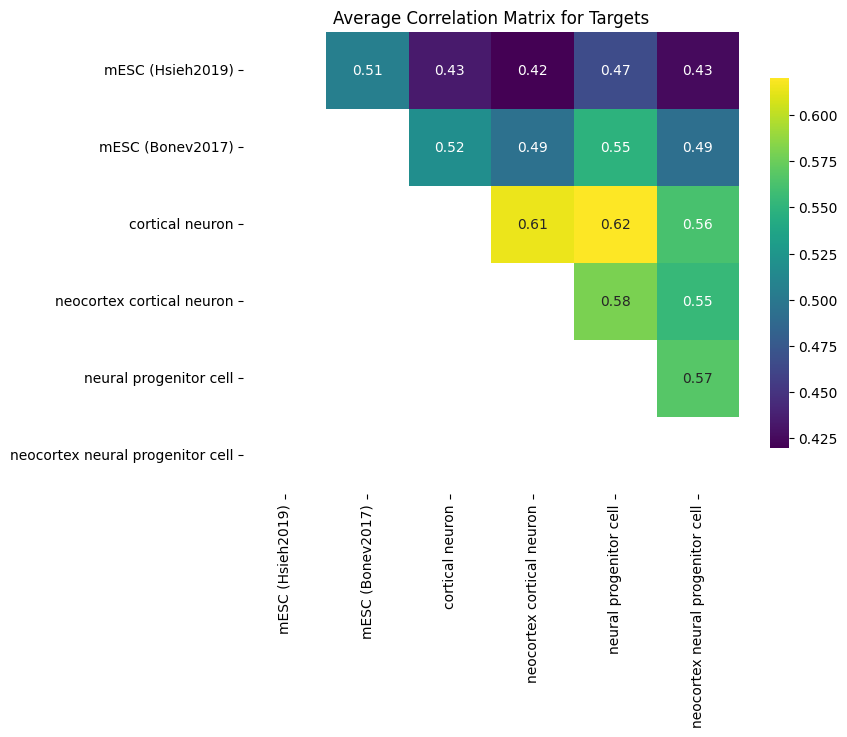

In [14]:
plot_heatmap(targ_corr_avg, "Average Correlation Matrix for Targets", cell_type_names=cell_types, save_path="./plots_mouse/targets_cell_type_corr.pdf")

## Correlations between cell-type differences

In [15]:
diff_corr = calculate_cell_type_differences_and_correlations(preds, targets)

/home1/smaruj/miniconda3/envs/basenji_py3.9_tf2.15/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


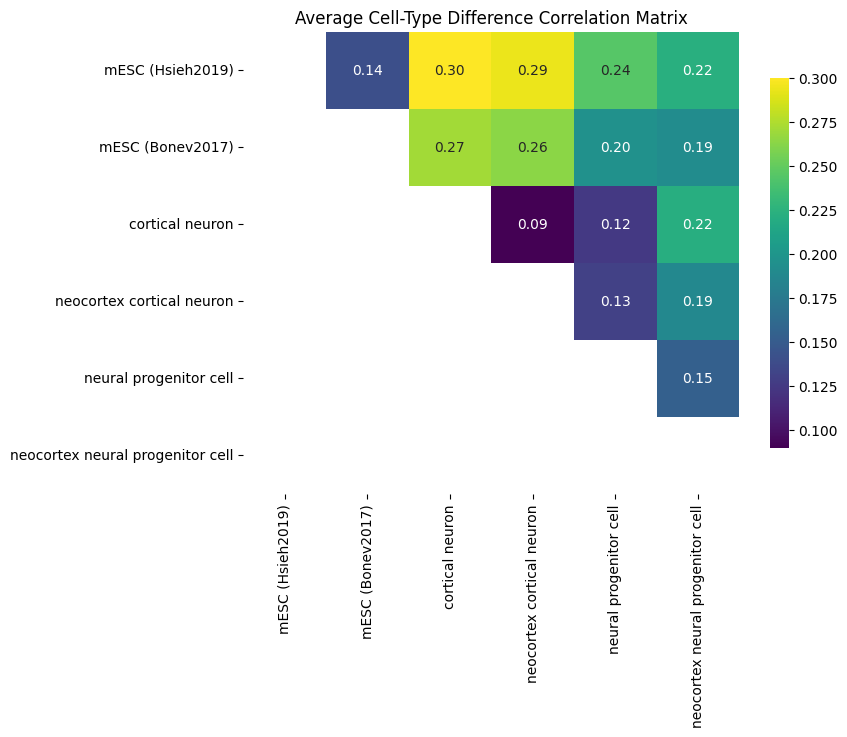

In [17]:
plot_heatmap(diff_corr, "Average Cell-Type Difference Correlation Matrix", cell_type_names=cell_types, save_path="./plots_mouse/cell_type_differences_corr.pdf")